In [36]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [37]:
#loading the dataset of .csv file

target_data = "../AAPL.csv"
apple_stock = pd.read_csv(target_data, parse_dates = True)
apple_stock.Date = pd.to_datetime(apple_stock.Date)
apple_stock.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-01-03,115.800003,116.330002,114.760002,116.150002,113.847588,28781900
1,2017-01-04,115.849998,116.510002,115.750000,116.019997,113.720161,21118100
2,2017-01-05,115.919998,116.860001,115.809998,116.610001,114.298462,22193600
3,2017-01-06,116.779999,118.160004,116.470001,117.910004,115.572708,31751900
4,2017-01-09,117.949997,119.430000,117.940002,118.989998,116.631294,33561900


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 7 columns):
Date         251 non-null datetime64[ns]
Open         251 non-null float64
High         251 non-null float64
Low          251 non-null float64
Close        251 non-null float64
Adj Close    251 non-null float64
Volume       251 non-null int64
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 13.8 KB


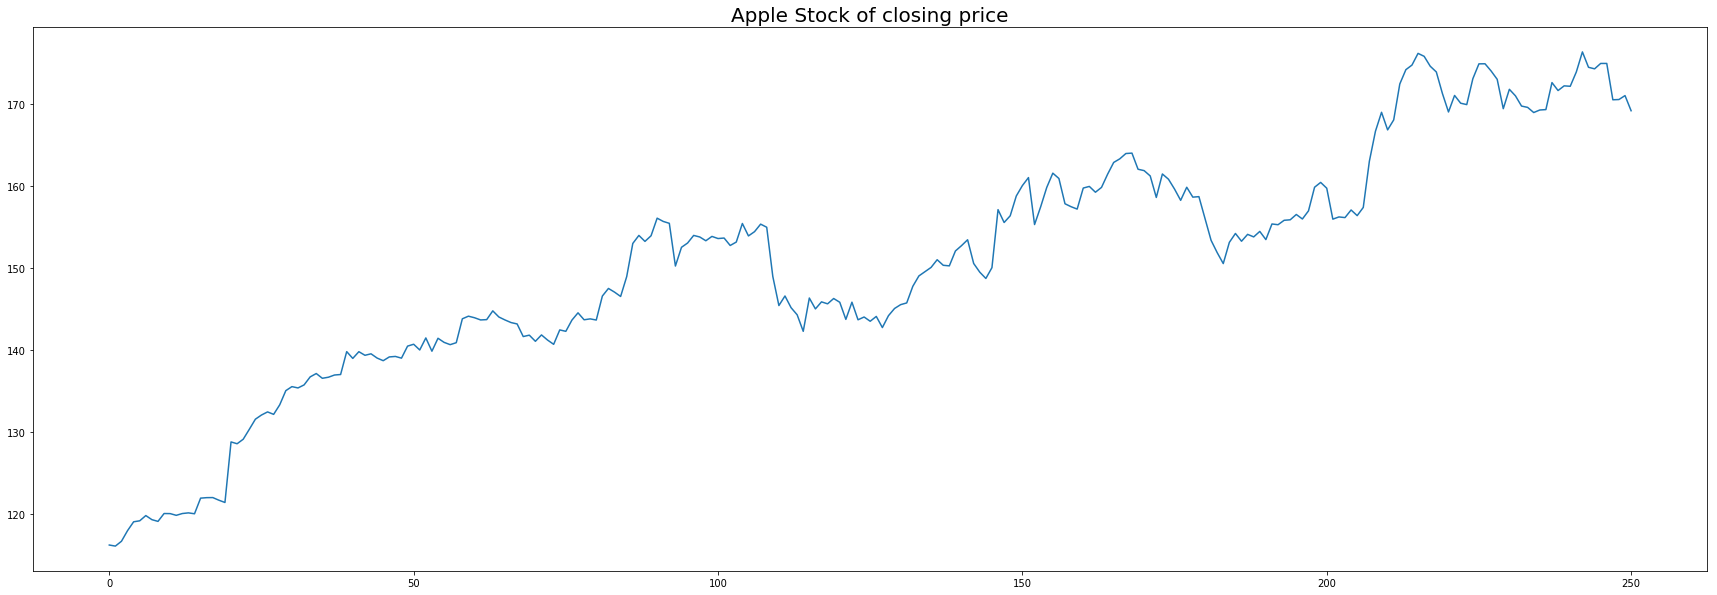

In [38]:
apple_stock.info()
plt.figure(figsize=(30,10))
plt.plot(apple_stock.index, apple_stock['Close'])
plt.title("Apple Stock of closing price", fontsize = 20)
plt.show()

In [50]:
# define the first rising sar and falling sar
#check for the trend, deside rising or falling

exam_data01 = {'Date': apple_stock['Date'],'High': apple_stock['High'], 'Low': apple_stock['Low'], 
               'Close': apple_stock['Close']}
df = pd.DataFrame(exam_data01)
rising_sar = []
falling_sar = []
# index 0 is the date, index 1 is the value
rising_sar.append([])
rising_sar.append([])
falling_sar.append([])
falling_sar.append([])

# 1 mean start with rising sar, 0 means start with falling sar
sar = []
#deside whether start with falling sar or start with rising sar
if(apple_stock['Close'][1] > apple_stock['Close'][0]):
    sar.append(1)
else:
    sar.append(0)
    
r_extreme_point = []
f_extreme_point = []
r_af = 0.02
f_af = 0.02

PSARMoney = 10000
SellAmount = 1000
BuyAmount = 1000
numStocks = PSARMoney/apple_stock['Close'][0]
PSARMoney = 0
#final_sar = []
#go through data row by row
for index, row in apple_stock.iterrows():
    #if this is the first stock price, follow the sar we descide before
    #if not, compre the price and descide it is a falling or a rising
    if(index == 0):
        if(sar[0] == 1):
            rising_sar[0].append(row['Date'])
            rising_sar[1].append(row['Low'])
            r_extreme_point.append(row['High'])
        else:
            falling_sar[0].append(row['Date'])
            falling_sar[1].append(row['High'])
            f_extreme_point.append(row['Low'])
    else:
        #if the close price is higher than falling sar, change to rising sar
        #if the close price is lower than rising sar, change to falling sar
        #calculate both extreme point every day
        
        #prior_r_sar = rising_sar[1][len(rising_sar[1])-1]
        #prior_f_sar = falling_sar[1][len(falling_sar[1])-1]
        #prior_r_ep = r_extreme_point[len(r_extreme_point)-1]
        #prior_f_ep = f_extreme_point[len(f_extreme_point)-1]
        
        if(sar[index-1] == 1):
            
            if(row['Close'] < rising_sar[1][len(rising_sar[1])-1]):
                #now changing to downward trend, falling sar
                
                if((numStocks-SellAmount/row['Close'])>0):
                    numStocks = numStocks - SellAmount/row['Close']
                    PSARMoney = PSARMoney + SellAmount
                elif(numStocks>0):
                    PSARMoney = PSARMoney + numStocks*row['Close']
                    numStocks = 0
                
                r_sar = 0.02
                try:
                    f_extreme_point.append(row['Low'])
                    sar.append(0)
                    falling_sar[0].append(row['Date'])
                    #falling_sar[1].append((falling_sar[1][len(falling_sar[1])-1] - f_af * 
                     #                      (falling_sar[1][len(falling_sar[1])-1] - f_extreme_point[len(f_extreme_point)-1])))
                    falling_sar[1].append(row['High'])
                    if(row['Low'] < f_extreme_point[len(f_extreme_point)-1]):
                        f_extreme_point.append(row['Low'])
                        if(f_af < 0.2):
                            f_af += 0.02
                except:
                    #falling_sar[0].append(row['Date'])
                    falling_sar[1].append(row['High'])
                    f_extreme_point.append(row['Low'])
            else:
                # continue upward trend, rising sar
                sar.append(1)
                rising_sar[0].append(row['Date'])
                rising_sar[1].append((rising_sar[1][len(rising_sar[1])-1] + r_af * 
                                      (r_extreme_point[len(r_extreme_point)-1] - rising_sar[1][len(rising_sar[1])-1])))
                
                if(row['High'] > r_extreme_point[len(r_extreme_point)-1]):
                    r_extreme_point.append(row['High'])
                    if(r_af < 0.2):
                        r_af += 0.02
        else:
            if(row['Close'] > falling_sar[1][len(falling_sar[1])-1]):
                #change to upward trend
                
                numStocks = numStocks + BuyAmount/row['Close']
                PSARMoney = PSARMoney - BuyAmount
                
                f_sar = 0.02
                try:
                    r_extreme_point.append(row['High'])
                    sar.append(1)
                    rising_sar[0].append(row['Date'])
                    #rising_sar[1].append((rising_sar[1][len(rising_sar[1])-1] + r_af * 
                     #                     (r_extreme_point[len(r_extreme_point)-1] - rising_sar[1][len(rising_sar[1])-1])))
                    rising_sar[1].append(row['Low'])
                    if(row['High'] >= r_extreme_point[len(r_extreme_point)-1]):
                        r_extreme_point.append(row['High'])
                        if(r_af < 0.2):
                            r_af += 0.02
                except:
                    #rising_sar[0].append(row['Date'])
                    rising_sar[1].append(row['Low'])
                    r_extreme_point.append(row['High'])
            else:
                #continue with downward trend
                sar.append(0)
                falling_sar[0].append(row['Date'])
                falling_sar[1].append((falling_sar[1][len(falling_sar[1])-1] - f_af * 
                                       (falling_sar[1][len(falling_sar[1])-1] - f_extreme_point[len(f_extreme_point)-1])))
                if(row['Low'] <= f_extreme_point[len(f_extreme_point)-1]):
                    f_extreme_point.append(row['Low'])
                    if(f_af < 0.2):
                        f_af += 0.02
PSARMoney = PSARMoney + numStocks*apple_stock['Close'].iloc[-1]
print PSARMoney

14815.3867325


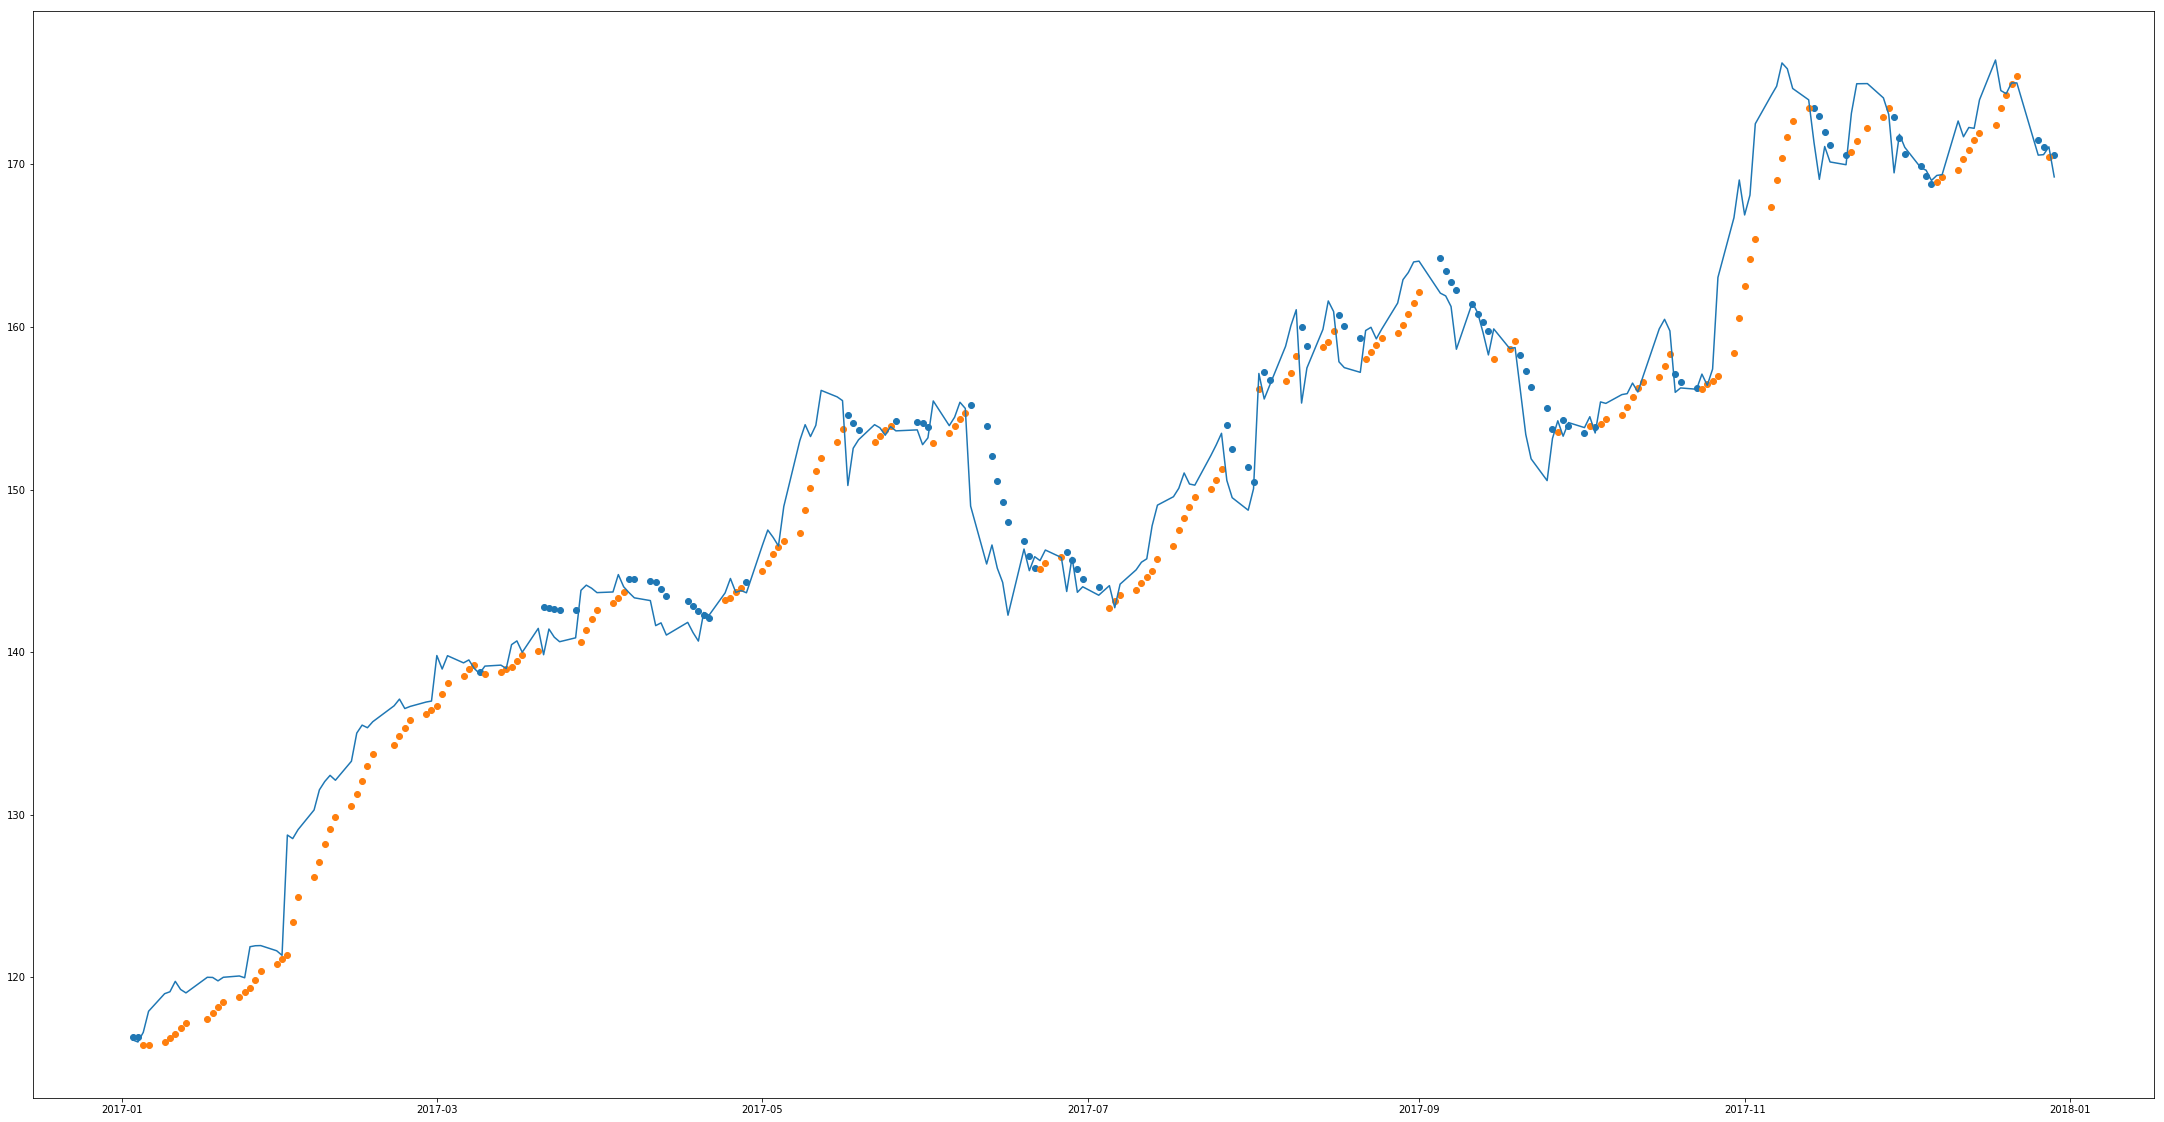

In [49]:
fig, ax = plt.subplots(1,1, figsize=(38,20))
x = df.Date
y = df['Close']
plt.plot(x, y, alpha=1)
#plt.plot(x, apple_stock['High'], alpha=1)
#plt.plot(x, apple_stock['Low'], alpha=1)
#falling_sar[0].pop(0)
#print falling_sar[1]
plt.scatter(falling_sar[0], falling_sar[1], alpha=1)
plt.scatter(rising_sar[0], rising_sar[1], alpha=1)
plt.show()

In [ ]:
#calculate the raising SAR
exam_data01 = {'Date': apple_stock['Date'],'High': apple_stock['High'], 'Low': apple_stock['Low'], 'Close': apple_stock['Close']}

df = pd.DataFrame(exam_data01)

##set up the new array 
Rextreme_point = []
acceleration_factor =[]
Rsar = []
## rows can be anything
for index, rows in apple_stock.iterrows():
    
    if (index == 0):
        Rextreme_point.append(rows['High'])
        acceleration_factor.append(0.02)
        Rsar.append(rows['Low'])

    else:
        if(rows['High'] > Rextreme_point[index-1]):
            Rextreme_point.append(rows['High'])
            
            if(acceleration_factor[index-1] <= 0.18):
                acceleration_factor.append(acceleration_factor[index-1] + 0.02)
            else:
                acceleration_factor.append(acceleration_factor[index-1])
        else:
            Rextreme_point.append(Rextreme_point[index-1])
            acceleration_factor.append(acceleration_factor[index - 1])
        Rsar.append(Rsar[index - 1] + acceleration_factor[index - 1]*(Rextreme_point[index - 1] - Rsar[index - 1]))
df['Rising Extreme Point'] = Rextreme_point

df['Rising Acceleration Factor'] = acceleration_factor

df['Rising SAR'] = Rsar
print df

In [ ]:
#calculate the failing SAR


Fextreme_point = []
acceleration_factor =[]
Fsar = []
## rows can be anything
for index, rows in apple_stock.iterrows():
    
    if (index == 0):
        Fextreme_point.append(rows['Low'])
        acceleration_factor.append(0.02)
        Fsar.append(rows['High'])

    else:
        if(rows['Low'] < Fextreme_point[index-1]):
            Fextreme_point.append(rows['Low'])
            
            if(acceleration_factor[index-1] <= 0.18):
                acceleration_factor.append(acceleration_factor[index-1] + 0.02)
            else:
                acceleration_factor.append(acceleration_factor[index-1])
        else:
            Fextreme_point.append(Fextreme_point[index-1])
            acceleration_factor.append(acceleration_factor[index - 1])
        Fsar.append(Fsar[index - 1] + acceleration_factor[index - 1]*(Fextreme_point[index - 1] - Fsar[index - 1]))
        
        
        
df['Falling Extreme Point'] = Fextreme_point

df['Falling Acceleration Factor'] = acceleration_factor

df['Falling SAR'] = Fsar
print df.head()

In [ ]:
#check the upward and downward trend
datapoint = []

for index, rows in apple_stock.iterrows():
    if(index == 0):
        datapoint.append(rows['High'])
    else:
        if(Rsar[index]>Fsar[index]):
            datapoint.append(Rsar[index])
        else:
            datapoint.append(Fsar[index])
            
df['datapoint'] = datapoint

print df['datapoint']

NameError: name 'datapoint' is not defined

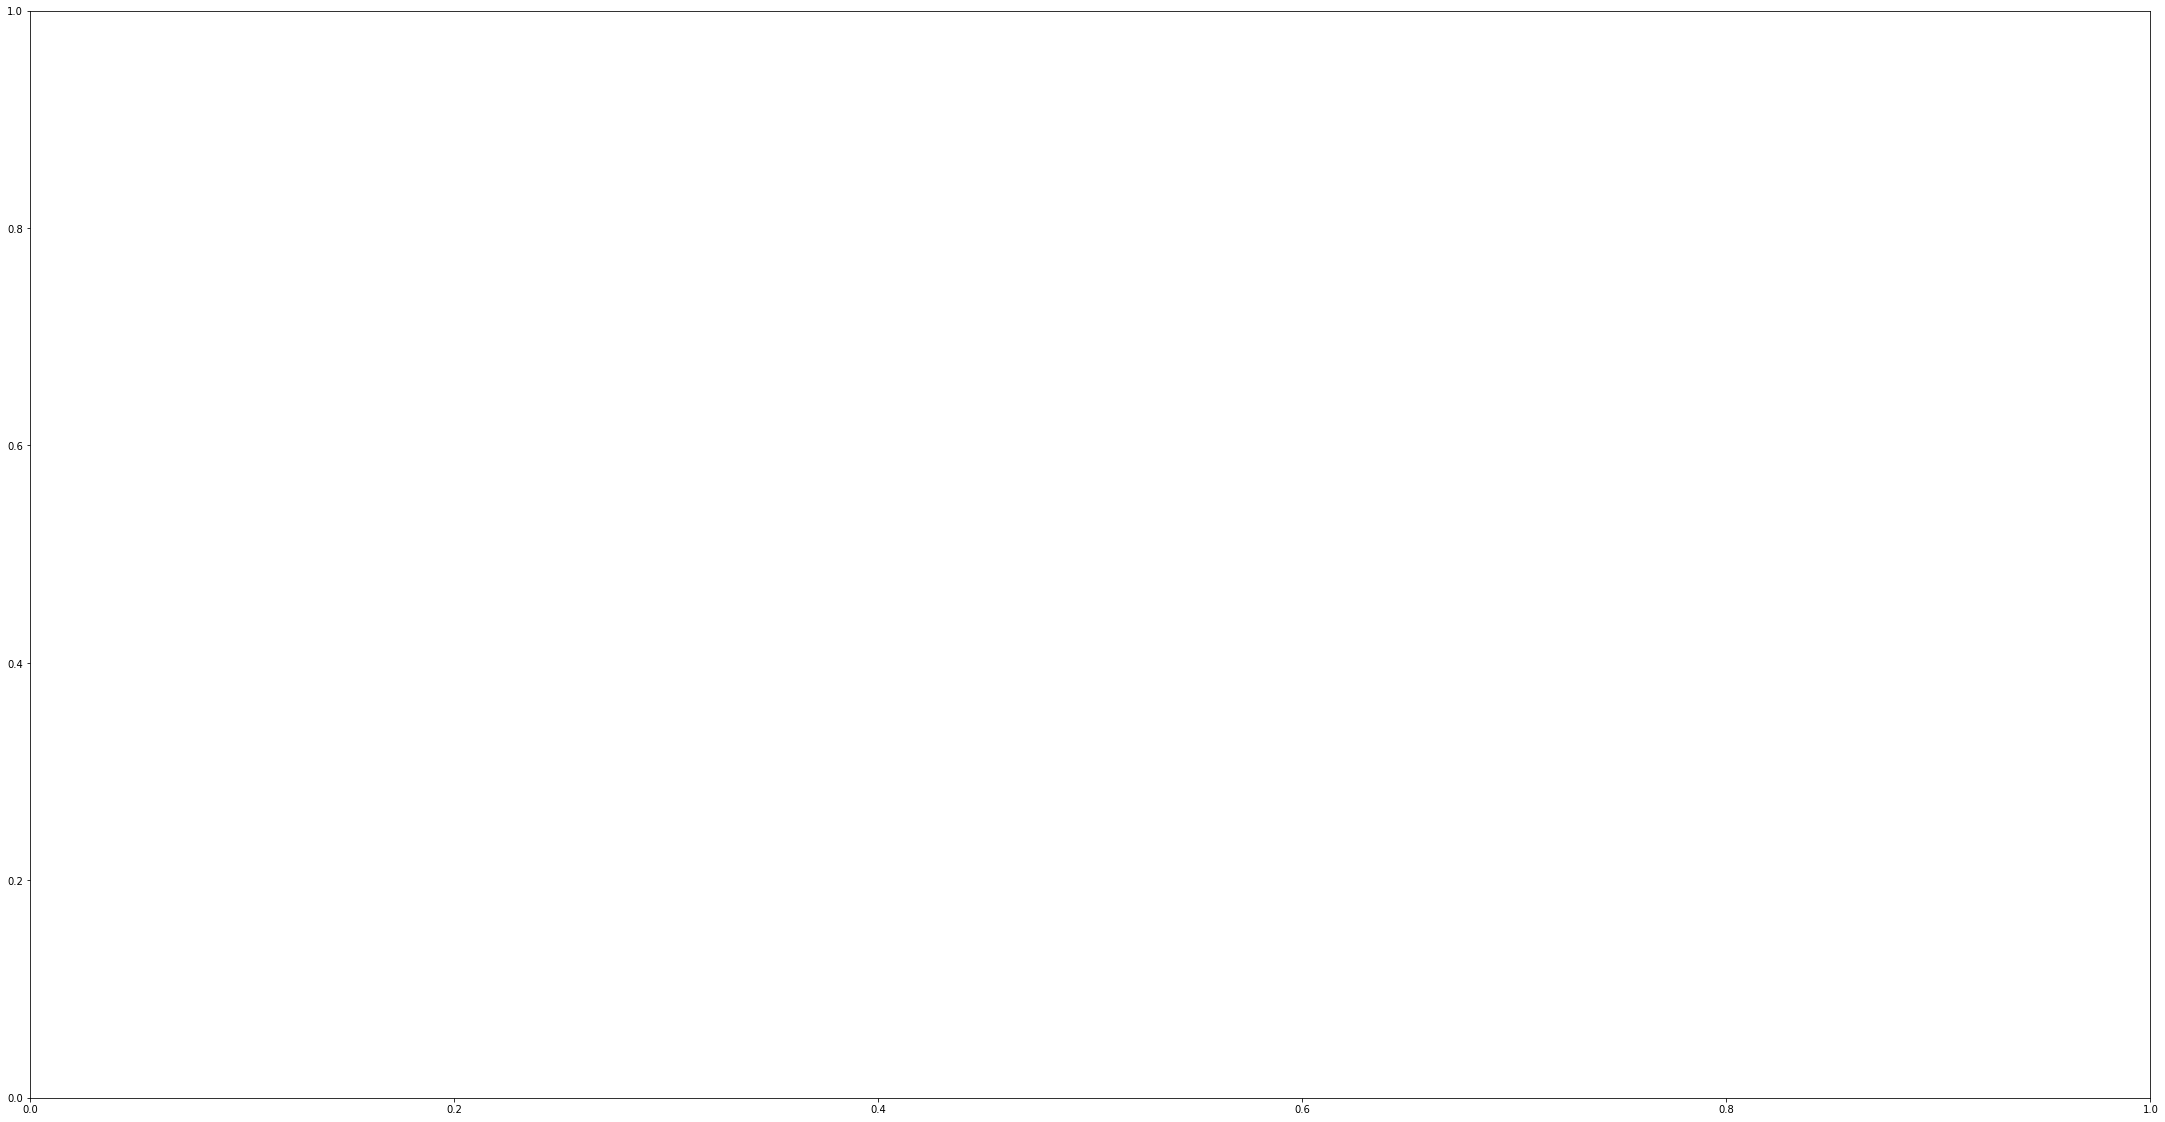

In [6]:
#do the scatter plot of rising and failing SAR
fig, ax = plt.subplots(1,1, figsize=(38,20))
x = df.index
y = df['Close']
plt.scatter(x, datapoint, alpha=1)
plt.plot(x, y, alpha=1)

plt.show()
